<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/tweety01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 	Choose an event/campaign that happened in the UK or worldwide recently (eg., Brexit). Apply sentiment analysis to show users’ opinions about the topic on Twitter. Represent your findings using statistical descriptive methods. 

In [214]:
import tweepy
from textblob import TextBlob
consumer_key='MiPlOEtMiZDUU0A286jcN3jrr'
consumer_secret_key='O9nv0WXPkcHgu6ry2CweZOgp08lA19na5TXxWQNl4Xw1FiH5NI'
access_token='1498074007-l0DlAvQPXooOd5oNJCCuV9LIHa3yzjUgT1VBl7R'
access_token_secret='oFqbnqacvyLxuDUrNF4Jzao0W7TaHBwFc9odVxQ9GvjA4'

In [215]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
posts=api.user_timeline(screen_name='Brexit',count=100,lang="en",tweet_mode="extended")
print('Show the 5 recent tweets:\n')
for tweet in posts[0:5]:
  print(tweet.full_text+'\n')


Show the 5 recent tweets:

RT @business: U.K. house prices surge at the strongest pace since 2004 https://t.co/bnodtuju03

This week in Brexit: A political reckoning unfolds in Northern Ireland after a deeply unpopular trade deal https://t.co/JAqF2wiupb

These are the allegations facing Boris Johnson, and what might happen next https://t.co/WCWxWNV0kL

This week in Brexit: A political reckoning unfolds in Northern Ireland after a deeply unpopular trade deal https://t.co/3ncWPX93ir

Here's what you need to know about Arlene Foster's resignation as First Minister of Northern Ireland, and what it means for Brexit https://t.co/bcKj8shCnQ



In [216]:
import pandas as pd

df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,RT @business: U.K. house prices surge at the s...
1,This week in Brexit: A political reckoning unf...
2,These are the allegations facing Boris Johnson...
3,This week in Brexit: A political reckoning unf...
4,Here's what you need to know about Arlene Fost...


In [217]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['Tweets']=df['Tweets'].apply(cleanData)

#show data
df

,Tweets
0,: U.K. house prices surge at the strongest pac...
1,This week in Brexit: A political reckoning unf...
2,These are the allegations facing Boris Johnson...
3,This week in Brexit: A political reckoning unf...
4,Here's what you need to know about Arlene Fost...
...,...
95,The EU is set to postpone legal action against...
96,: The European Union’s drug regulator starts a...
97,8/ So where does that leave the U.K.?\n\nThe f...
98,"7/ Before the referendum, many in the City of ..."


In [218]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,subjectivity,Polarity
0,: U.K. house prices surge at the strongest pac...,0.000000,0.000000
1,This week in Brexit: A political reckoning unf...,0.250000,0.000000
2,These are the allegations facing Boris Johnson...,0.000000,0.000000
3,This week in Brexit: A political reckoning unf...,0.250000,0.000000
4,Here's what you need to know about Arlene Fost...,0.333333,0.250000
...,...,...,...
95,The EU is set to postpone legal action against...,0.100000,0.100000
96,: The European Union’s drug regulator starts a...,0.000000,0.000000
97,8/ So where does that leave the U.K.?\n\nThe f...,0.583333,0.157143
98,"7/ Before the referendum, many in the City of ...",0.500000,0.250000


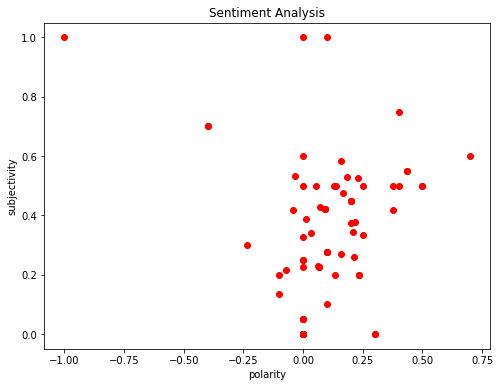

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='red')

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

2.	**Access News APIs for articles related to the chosen event/campaign (Minimum of 5 articles)** 


*   Perform all required cleaning and pre-processing on the articles.
*   Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).

*   Use topic modelling techniques to discover key topics. Display your findings using proper graphs, such as word cloud.
* Provide a summary on one of the news articles. Comment on the summarisation quality  


In [195]:
!pip install newsapi-python

In [196]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd

In [197]:
my_api_key='37925137cd4749ad8db14762cf5dd24d'
newsapi = NewsApiClient(api_key=my_api_key)

In [198]:
all_articles = newsapi.get_everything(q='Brexit',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [199]:
type(all_articles)

dict

In [200]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [201]:
all_articles['status']

'ok'

In [202]:
all_articles['totalResults']

117

In [203]:
x=all_articles['articles']

In [205]:
df=pd.DataFrame(x)
                            
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Wales election: Details on independent Wales '...,Plaid Cymru has pledged to hold an independenc...,https://www.bbc.co.uk/news/uk-wales-politics-5...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Brexit: Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,https://www.bbc.co.uk/news/world-europe-56765681,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-15T17:30:15Z,image captionZeebrugge: Channel ports have new...
2,"{'id': 'bbc-news', 'name': 'BBC News'}",None,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,https://www.bbc.co.uk/news/av/uk-northern-irel...,https://ichef.bbci.co.uk/images/ic/400xn/p09ck...,2021-04-01T23:07:43Z,"The ferry operator, Stena Line, says Brexit is..."
3,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Keeping score on UK-EU relations since Brexit,"Despite promises to work together, it has been...",https://www.bbc.co.uk/news/av/uk-politics-5657...,https://ichef.bbci.co.uk/images/ic/400xn/p09c6...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Restaurants struggle to find staff ahead of re...,Some venues may have to limit their opening ho...,https://www.bbc.co.uk/news/business-56919575,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-29T23:03:34Z,By Amie Keeley Business reporter\r\nimage copy...


**Perform all required cleaning and pre-processing on the articles**

In [206]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r':','',text)#Remove :
  text=re.sub(r',','',text)#Remove ,
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['description']=df['description'].apply(cleanData)
df['title']=df['title'].apply(cleanData)
df['content']=df['content'].apply(cleanData)
df['index'] = df.index
#show data
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,index
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Wales election Details on independent Wales 'n...,Plaid Cymru has pledged to hold an independenc...,https://www.bbc.co.uk/news/uk-wales-politics-5...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...,0
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Brexit Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,https://www.bbc.co.uk/news/world-europe-56765681,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-15T17:30:15Z,image captionZeebrugge Channel ports have new ...,1
2,"{'id': 'bbc-news', 'name': 'BBC News'}",None,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,https://www.bbc.co.uk/news/av/uk-northern-irel...,https://ichef.bbci.co.uk/images/ic/400xn/p09ck...,2021-04-01T23:07:43Z,The ferry operator Stena Line says Brexit is s...,2
3,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Keeping score on UK-EU relations since Brexit,Despite promises to work together it has been ...,https://www.bbc.co.uk/news/av/uk-politics-5657...,https://ichef.bbci.co.uk/images/ic/400xn/p09c6...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...,3
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Restaurants struggle to find staff ahead of re...,Some venues may have to limit their opening ho...,https://www.bbc.co.uk/news/business-56919575,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-29T23:03:34Z,By Amie Keeley Business reporter\r\nimage copy...,4


In [207]:
new_data=df[['index','title','description','publishedAt','content']]


**Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).**

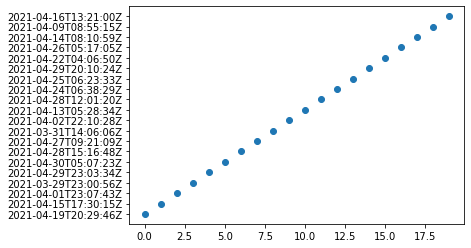

In [208]:
plt.scatter(new_data['index'],new_data['publishedAt'])

In [209]:
new_data['content_count']=new_data['content'].apply(lambda n:len(n.split(' ')))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [210]:
new_data

,index,title,description,publishedAt,content,content_count
0,0,Wales election Details on independent Wales 'n...,Plaid Cymru has pledged to hold an independenc...,2021-04-19T20:29:46Z,image copyrightGetty Images\r\nimage captionAd...,35
1,1,Brexit Euro MPs' vote bolsters EU-UK trade deal,The key Brexit trade deal now stands a better ...,2021-04-15T17:30:15Z,image captionZeebrugge Channel ports have new ...,29
2,2,What it's like driving across the new Irish tr...,Three months since the creation of the new Iri...,2021-04-01T23:07:43Z,The ferry operator Stena Line says Brexit is s...,35
3,3,Keeping score on UK-EU relations since Brexit,Despite promises to work together it has been ...,2021-03-29T23:00:56Z,The relationship between the UK and the EU sin...,35
4,4,Restaurants struggle to find staff ahead of re...,Some venues may have to limit their opening ho...,2021-04-29T23:03:34Z,By Amie Keeley Business reporter\r\nimage copy...,33
5,5,Arlene Foster to quit DUP after leaving leader...,Arlene Foster believes the DUP is no longer th...,2021-04-30T05:07:23Z,image captionArlene Foster has been a member o...,35
6,6,Arlene Foster Why did the DUP move against its...,The BBC's Jayne McCormack takes a look at what...,2021-04-28T15:16:48Z,By Jayne McCormackBBC News NI Political Report...,32
7,7,French warn UK ahead of vote on Brexit trade deal,French concern over fishing rights overshadows...,2021-04-27T09:21:09Z,image captionEU Commission chief Ursula von de...,32
8,8,Palantir NHS says future deals 'will be transp...,It follows a lawsuit accusing the NHS of “snea...,2021-03-31T14:06:06Z,image copyrightGetty Images\r\nThe NHS has pro...,31
9,9,Daily Crunch Apple Arcade expands with classic...,Apple adds classic titles to Apple Arcade Micr...,2021-04-02T22:10:28Z,(Bloomberg) -- Britishvolt Ltd. the developer ...,32


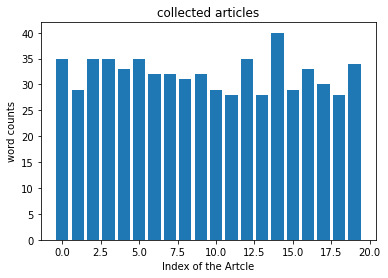

In [221]:
plt.bar(new_data['index'],new_data['content_count'])
plt.title('collected articles')
plt.xlabel('Index of the Artcle')
plt.ylabel('word counts')
plt.show()